### Table of contents
#### 1. Import libraries and data set
#### 2. Preparation for data regression
#### 3. Regression
#### 4. Concusion

### 1. Import libraries and data set

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
path = r'/Users/jakubkondelka/Documents/JK_USkillings'

In [3]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'USkillings_initcleaned.pkl'))

In [4]:
df.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15.0,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


#### All cleaning and wrangling has been done previously, as the same data set is being used.

In [25]:
df.dtypes

Record ID                  int64
Agency Code               object
Agency Name               object
Agency Type               object
City                      object
State                     object
Year                       int64
Month                     object
Incident                   int64
Crime Type                object
Crime Solved              object
Victim Sex                object
Victim Age                 int64
Victim Race               object
Victim Ethnicity          object
Perpetrator Sex           object
Perpetrator Age          float64
Perpetrator Race          object
Perpetrator Ethnicity     object
Relationship              object
Weapon                    object
Victim Count               int64
Perpetrator Count          int64
Record Source             object
dtype: object

In [28]:
df['Incident'].mean()

22.967797159696953

### 2. Preparation for data regression

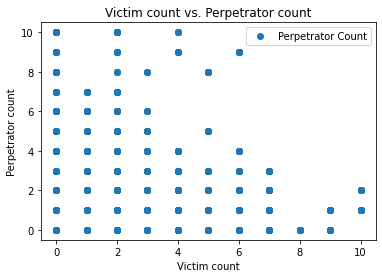

In [6]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Victim Count', y='Perpetrator Count',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Victim count vs. Perpetrator count')  
plt.xlabel('Victim count')  
plt.ylabel('Perpetrator count')  
plt.show()

#### Hypothesis : confirm the positive relatinship between Victim count and Perpetrator count i.e. when there is incident involving more victims, there is a likelihood of more perpetrators being present

In [7]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Victim Count'].values.reshape(-1,1)
y = df['Perpetrator Count'].values.reshape(-1,1)

In [8]:
X

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [10]:
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [1]])

In [11]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 3. Regression analysis

In [12]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [13]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [14]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

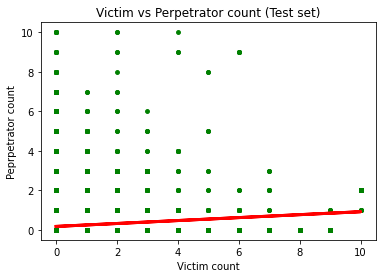

In [16]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='green', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Victim vs Perpetrator count (Test set)')
plot_test.xlabel('Victim count')
plot_test.ylabel('Peprpetrator count')
plot_test.show()

In [24]:
y_predicted

array([[0.17657498],
       [0.32529629],
       [0.17657498],
       ...,
       [0.17657498],
       [0.17657498],
       [0.17657498]])

In [17]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [18]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.07436066]]
Mean squared error:  0.3395626556272589
R2 score:  0.004184876260474035


#### Slope - is positive, which confirms some correlation, however the number is very low, therefore this is insignificaint for us
#### MSE - is quite large compared to the dataset, at 0.34. This shows that regression is not the best model to represent this data
#### r2 score is very small at 0.4%. This clearly shows the relationship between the 2 variables is negligible

In [19]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0,0.176575
1,0,0.325296
2,0,0.176575
3,0,0.176575
4,0,0.176575
5,0,0.176575
6,0,0.176575
7,0,0.176575
8,0,0.176575
9,0,0.250936


### 4. Conclusion
#### The differences between predicted values and actual values are large, confirming that the regression model is not the right model to use for this analysis